In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from math import sqrt

#### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy  
Полученные значения должны быть равны.  
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

*Вариант 1*

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

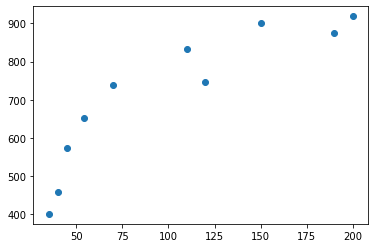

In [4]:
plt.scatter(zp, ks)
plt.show()

$$cov_{XY} = M[(X - M(X))(Y - M(Y))] = M(XY) - M(X)M(Y)=\overline{X \cdot Y} - \overline{X} \cdot \overline{Y}$$

где $M$ — математическое ожидание, $\overline{X} и \:\overline{Y}$ — среднее значение выборок.

In [5]:
cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
cov

9157.839999999997

In [6]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [7]:
np.cov(zp, ks, ddof=0)[0, 1] # Смещенная оценка

9157.84

In [8]:
np.corrcoef(zp, ks) # Коэффициент корреляции Пирсона

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

*Вариант 2*

In [9]:
df = pd.DataFrame({'zp':zp, 'ks':ks}, columns=['zp', 'ks'])
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [10]:
df.cov().values[0,1] # Несмещенная оценка

10175.377777777776

In [11]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


In [12]:
ks.std(ddof=1) # Несмещенная оценка стандартного отклонения

183.99544076477068

In [13]:
zp.std(ddof=1)

62.31318747531162

In [14]:
10175.3777 / (ks.std(ddof=1) * zp.std(ddof=1))

0.8874900852901869

In [15]:
9157 / (ks.std() * zp.std())

0.8874086873237411

#### Задание 2
Измерены значения IQ выборки студентов,обучающихся в местных технических вузах:  
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.  
Известно, что в генеральной совокупности IQ распределен нормально.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.  

**M(X) = 0.95**

In [16]:
X = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
X

array([131, 125, 115, 122, 131, 115, 107,  99, 125, 111])

$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения.

$$ \left( \overline{X} - t^n_{1-\frac{\alpha}{2}} \frac{\sigma_X}{\sqrt{n}},
          \overline{X} + t^n_{1-\frac{\alpha}{2}} \frac{\sigma_X}{\sqrt{n}}
   \right) $$

In [17]:
n = len(X)
n

10

In [18]:
mu = np.mean(X)
mu

118.1

In [19]:
sigma = np.std(X, ddof=1) # несмещенная оценка
sigma

10.54566788359614

In [20]:
alpha = 0.05

In [21]:
t = stats.t.ppf(1 - 0.05 / 2, 9)
t

2.2621571627409915

In [22]:
(mu - t * sigma / sqrt(n), mu + t * sigma / sqrt(n) )

(110.55608365158724, 125.64391634841274)

#### Задание 3
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см.  
Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

**(1-alpha) = 95%  
alpha = 5%;  alpha / 2 = 2,5%  
Z-табл = 1.96**

$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}$$

**Доверительный интервал** $$ \left( \overline{X} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}},
          \overline{X} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
         \right) $$

In [23]:
z = stats.norm.ppf(1 - 0.05 / 2)
z

1.959963984540054

In [24]:
D = 25 

In [25]:
n = 27  

In [26]:
M = 174.2

In [27]:
(M - z * sqrt(D) / sqrt(n), M + z * sqrt(D) / sqrt(n) )

(172.3140237765397, 176.08597622346028)